In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


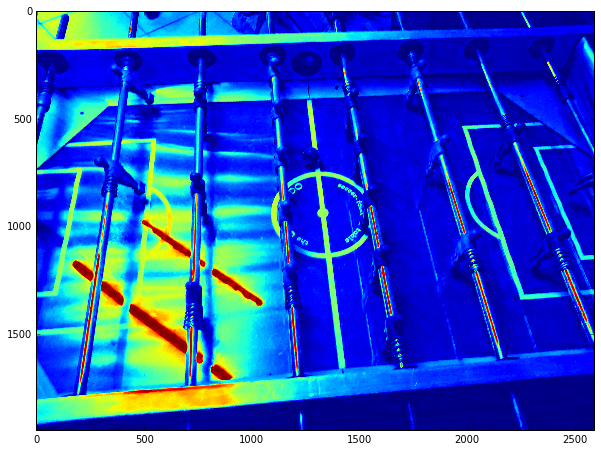

In [2]:
imshow(imread('IMG_20160614_205347.jpg')[:,:,2])

In [3]:
image = imread('IMG_20160614_205345.jpg')

In [4]:
THRESHOLD_LOWER = np.array([210, 190, 5])
THRESHOLD_UPPER = np.array([255, 250, 70])

In [5]:
%timeit np.all(np.logical_and(THRESHOLD_LOWER < image, image < THRESHOLD_UPPER), axis=2)

10 loops, best of 3: 174 ms per loop


In [6]:
def filter_image(image):
    return np.all(np.logical_and(THRESHOLD_LOWER < image, image < THRESHOLD_UPPER), axis=2)

In [7]:
def find_ball(image_filtered):
    ball_pixels = np.where(image_filtered)
    here_it_is = np.median(ball_pixels[0]), np.median(ball_pixels[1])
    return here_it_is

In [8]:
image_filtered = filter_image(image)
here_it_is = find_ball(image_filtered)

In [47]:
imsave('/tmp/asdf.png', image_filtered)

In [34]:
%timeit find_ball(image_filtered)

100 loops, best of 3: 12.1 ms per loop


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


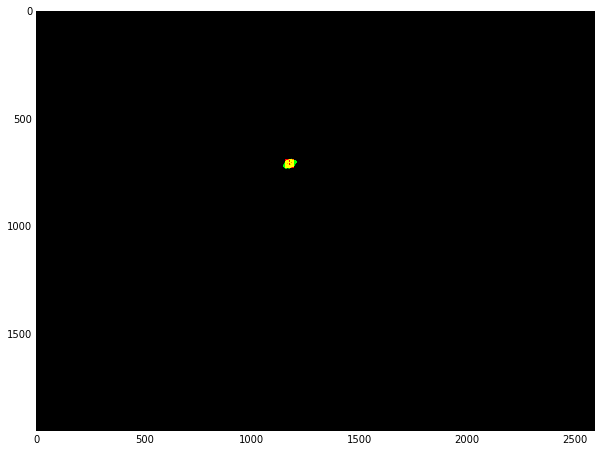

In [10]:
pixel_size = 20
out = np.zeros(image.shape)
out[here_it_is[0] - pixel_size:here_it_is[0] + pixel_size,
    here_it_is[1] - pixel_size:here_it_is[1] + pixel_size, 0] = 1
out[:, :, 1] = image_filtered.astype(int)
imshow(out)

In [53]:
image_filtered.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

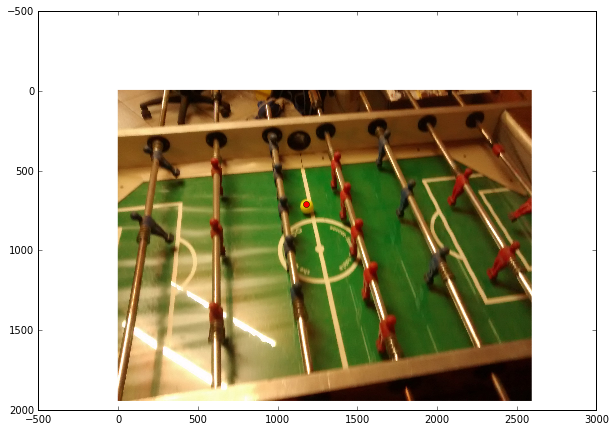

In [36]:
#here_it_or_not = np.array(image.shape)[:2] - np.array(here_it_is)
or_here = np.array((here_it_is[1], here_it_is[0]))

imshow(image)
plot(*or_here, 'ro')
